In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# Import car price dataset
data = pd.read_csv('datasets_33080_1320127_car data.csv')
data.head(3)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0


###### Dataframe info

In [3]:
print(f"Data shape: \n {data.shape} \n")
print(f"Data columns: \n {data.columns} \n")
print(f"Data index: \n {data.index} \n")
print(f"Data values: \n {data.values} \n")
print(f"Data info: \n {data.info} \n")
print(f"Data summary: \n")
data.describe()

Data shape: 
 (301, 9) 

Data columns: 
 Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object') 

Data index: 
 RangeIndex(start=0, stop=301, step=1) 

Data values: 
 [['ritz' 2014 3.35 ... 'Dealer' 'Manual' 0]
 ['sx4' 2013 4.75 ... 'Dealer' 'Manual' 0]
 ['ciaz' 2017 7.25 ... 'Dealer' 'Manual' 0]
 ...
 ['city' 2009 3.35 ... 'Dealer' 'Manual' 0]
 ['city' 2017 11.5 ... 'Dealer' 'Manual' 0]
 ['brio' 2016 5.3 ... 'Dealer' 'Manual' 0]] 

Data info: 
 <bound method DataFrame.info of     Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0       ritz  2014           3.35           5.59       27000    Petrol   
1        sx4  2013           4.75           9.54       43000    Diesel   
2       ciaz  2017           7.25           9.85        6900    Petrol   
3    wagon r  2011           2.85           4.15        5200    Petrol   
4      swift  2014           4.60           6

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


Description of columns:

Car_Name - This column should be filled with the name of the car.

Year - This column should be filled with the year in which the car was bought.

Selling_Price - This column should be filled with the price the owner wants to sell the car at.

Present_Price - This is the current ex-showroom price of the car.

Kms_Driven - This is the distance completed by the car in km.

Fuel_Type - Fuel type of the car.

Seller_Type - Defines whether the seller is a dealer or an individual.

Transmission - Defines whether the car is manual or automatic.

Owner - Defines the number of owners the car has previously had.


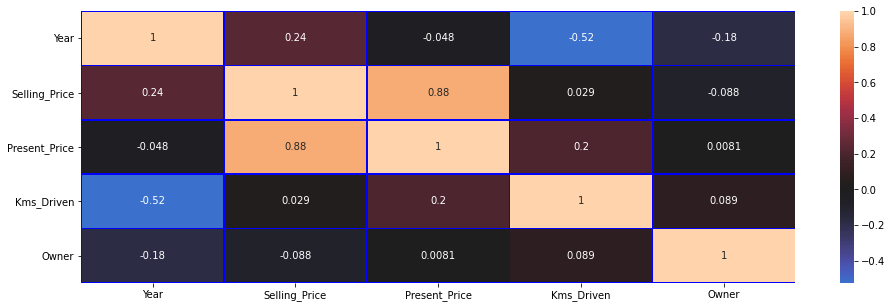

In [4]:
# Correlation matrix
data_numeric = data.drop(['Car_Name', 'Fuel_Type', 'Seller_Type', 'Transmission'], axis = 1)
corr_matrix_origin = data_numeric.corr(method ='pearson')
list_col_origin = list(data_numeric.columns)
plt.figure(figsize = (16,5))
ax = sns.heatmap(corr_matrix_origin, annot=True,
                 yticklabels=list_col_origin,
                 xticklabels=list_col_origin,
                 annot_kws={'size': 10},
                linecolor='blue', center=False,  linewidths=.5)

As we can see there are higher correlation between year and Kms_Driven which is obious. Also, higher effect on Selling_Price has Present_Price of cars.

#### Data visualisation

In [5]:
# Let see the distribution of each independent variable
# First we will define function for subplots of histograms
def sub_hist(data, m=15, n=25, num_col = None, *args):
    if data.shape[1] %2 == 0:
        i = data.shape[1]//num_col
    else:
        i = data.shape[1]//num_col + 1
    fig, axes = plt.subplots(i, num_col, figsize=(m, n))
    if i == 1:
        for j in range(num_col):
            sns.distplot(data[data.columns[j]], ax=axes[j] )
    else:
        for i in range(i):
            for j in range(num_col):
                if (2*i+j) < data.shape[1]:
                    sns.distplot(data[data.columns[2*i+j]], ax=axes[i,j] )
                else:
                    axes[i,j].set_axis_off()


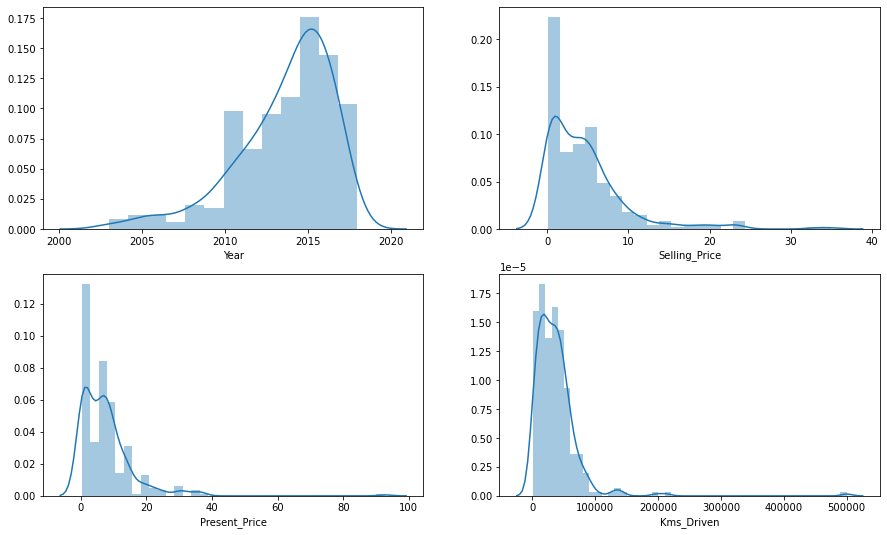

In [9]:
sub_hist(data = data.drop(['Car_Name', 'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'], axis = 1), m=15, n=9,num_col =2)

In [10]:
# Let create function for subplots of boxplots
def sub_boxplot(data, m=15, n=25, num_col = None, y=None, hue=None, orient='h', *args):
    if data.shape[1] %2 == 0:
        i = data.shape[1]//num_col
    else:
        i = data.shape[1]//num_col + 1
    fig, axes = plt.subplots(i, num_col, figsize=(m, n))
    for i in range(i):
        for j in range(num_col):
            if (2*i+j) < data.shape[1]:
                sns.boxplot(x = data.columns[2*i+j], y=y, data=data, hue=hue, orient=orient , ax=axes[i,j] )
            else:
                axes[i,j].set_axis_off()

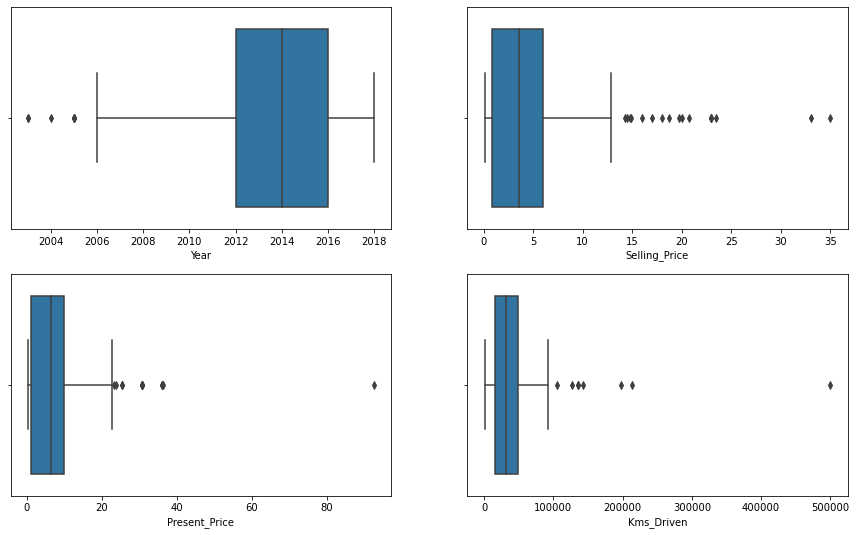

In [12]:
# Let see the distribution of each continual feature in dataset using boxplots
sub_boxplot(data = data.drop(['Car_Name', 'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'], axis=1),m=15,n=9, num_col = 2)

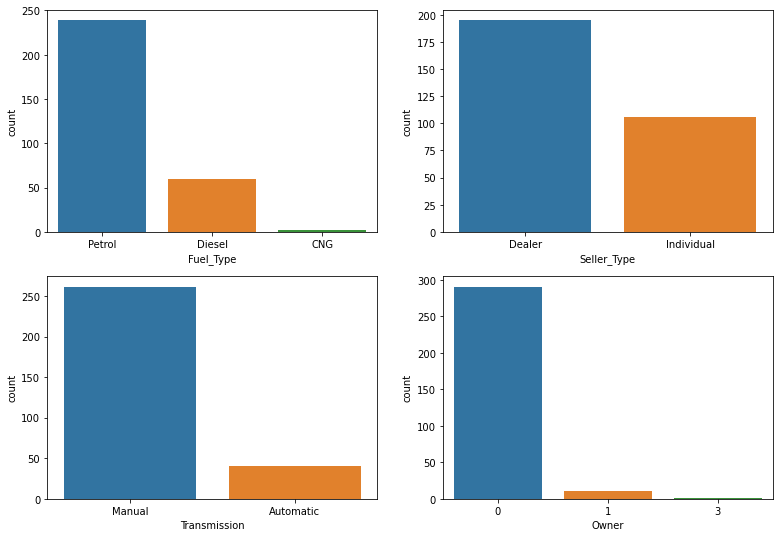

In [13]:
# Let see the distribution of nominal feature 
fig, axes = plt.subplots(2, 2, figsize=(13, 9))
sns.countplot(data.Fuel_Type, ax = axes[0,0])
sns.countplot(data.Seller_Type, ax = axes[0,1])
sns.countplot(data.Transmission, ax = axes[1,0])
sns.countplot(data.Owner, ax = axes[1,1])

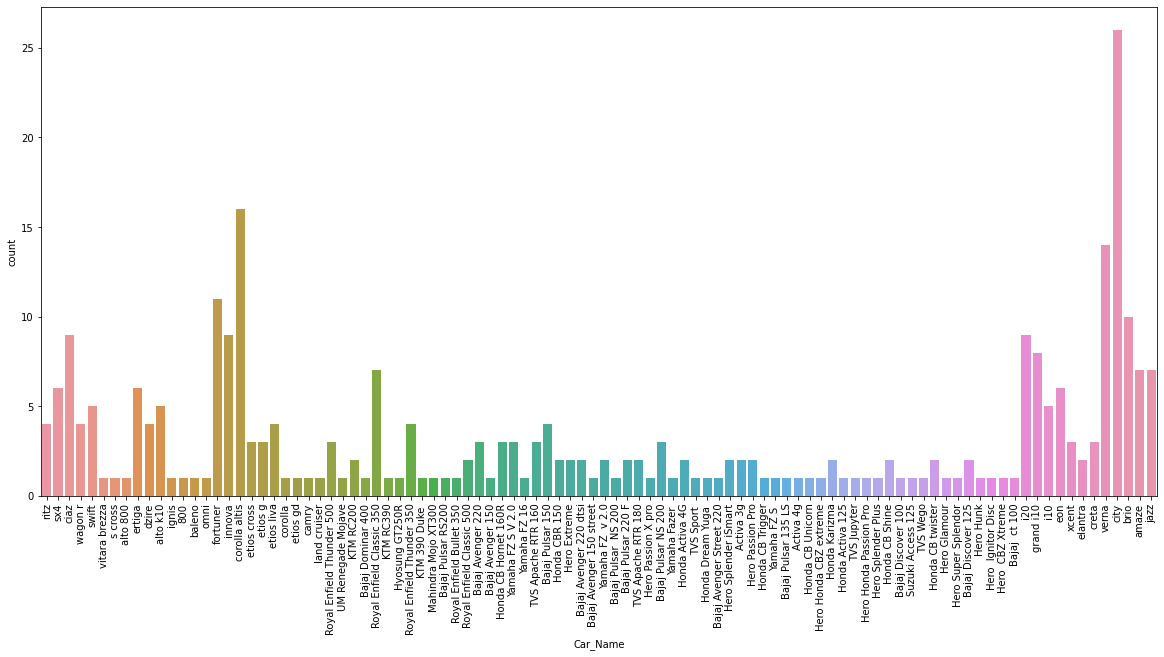

In [27]:
# Let see the distribution of descrete variable Car_Name
plt.figure(figsize=(20, 9))
plt.xticks(rotation=90)
sns.countplot(data.Car_Name)

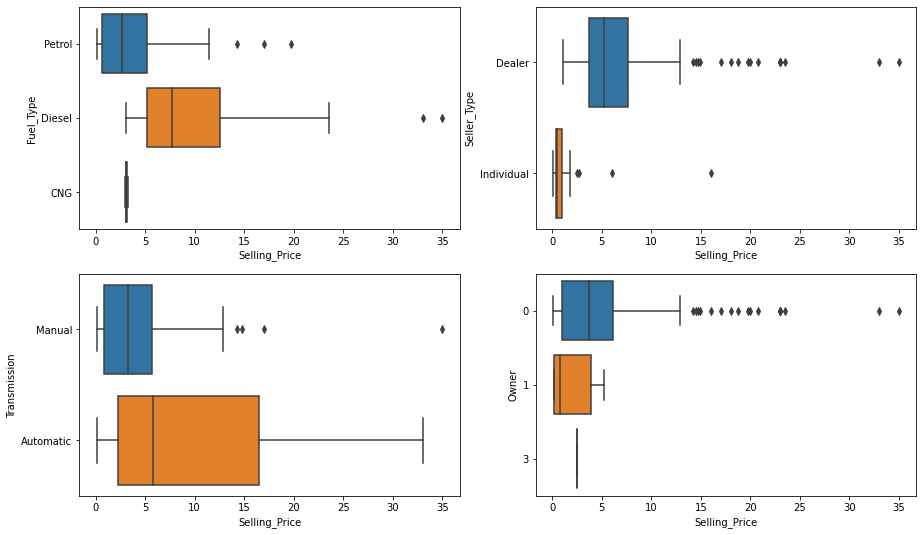

In [16]:
# Distribution of Selling_Price by Fuel_Type, Seller_Type, Transmission, Owner
fig, axes = plt.subplots(2, 2, figsize=(15, 9))
sns.boxplot(x=data.Selling_Price, y=data.Fuel_Type, ax = axes[0,0], orient = 'h')
sns.boxplot(x=data.Selling_Price, y=data.Seller_Type, ax = axes[0,1], orient = 'h')
sns.boxplot(x=data.Selling_Price, y=data.Transmission, ax = axes[1,0], orient = 'h')
sns.boxplot(x=data.Selling_Price, y=data.Owner, ax = axes[1,1], orient = 'h')

In [17]:
# Let create function for ploting scatter plot between variables
def sub_scatterplot(data, m=15, n=25, y = None, hue = None, num_col = None, *args):
    num = 2 if hue else 1
    if (data.shape[1]-num) %2 == 0:
        i = (data.shape[1]-num)//num_col
    else:
        i = (data.shape[1]-num)//num_col + 1
    fig, axes = plt.subplots(i, num_col, figsize=(m, n))
    data_col = list(data.columns)
    data_col = [x for x in data_col if x not in {y, hue}]
    if i == 1:
        for j in range(num_col):
            sns.scatterplot(x = data_col[j], y=y, data=data, hue=hue, ax=axes[j])
    else:
        for i in range(i):
            for j in range(num_col):
                if (2*i+j) < (data.shape[1]-num):
                    sns.scatterplot(x = data_col[2*i+j], y=y, data=data, hue=hue, ax=axes[i,j])
                else:
                    axes[i,j].set_axis_off()

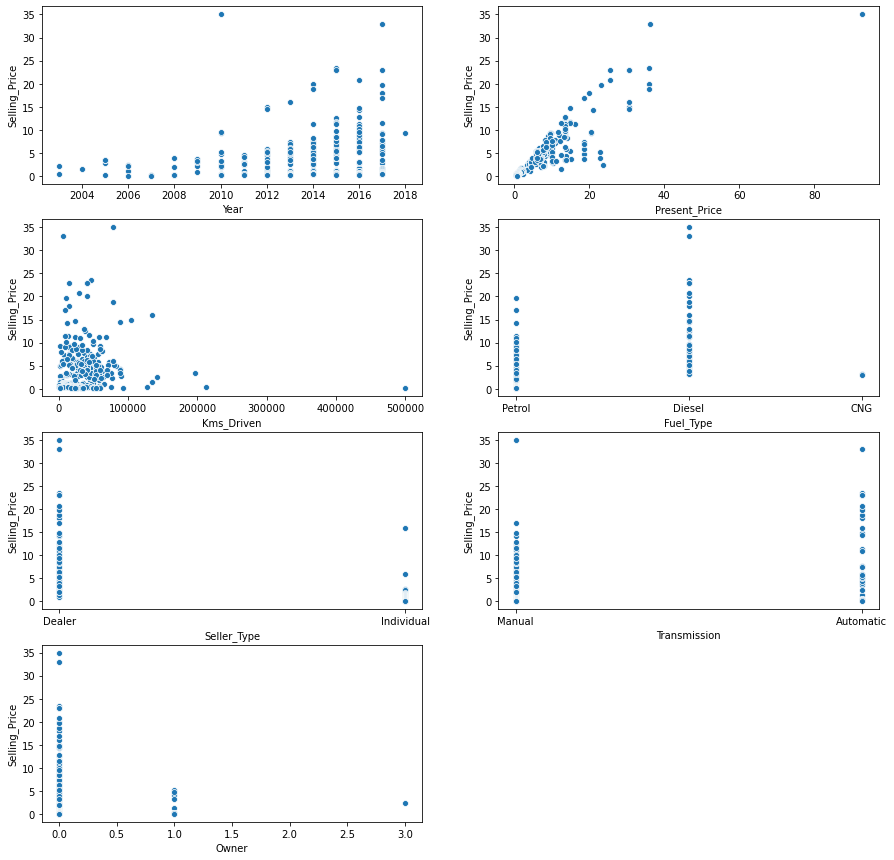

In [19]:
# Let see the distribution of each descrete feature and target variable
sub_scatterplot(data = data.drop('Car_Name', axis = 1), y ='Selling_Price', m=15, n=15, num_col = 2)

We can conclude that there are strong linear relationship between total_rooms and population, housholds. Also, population and households.

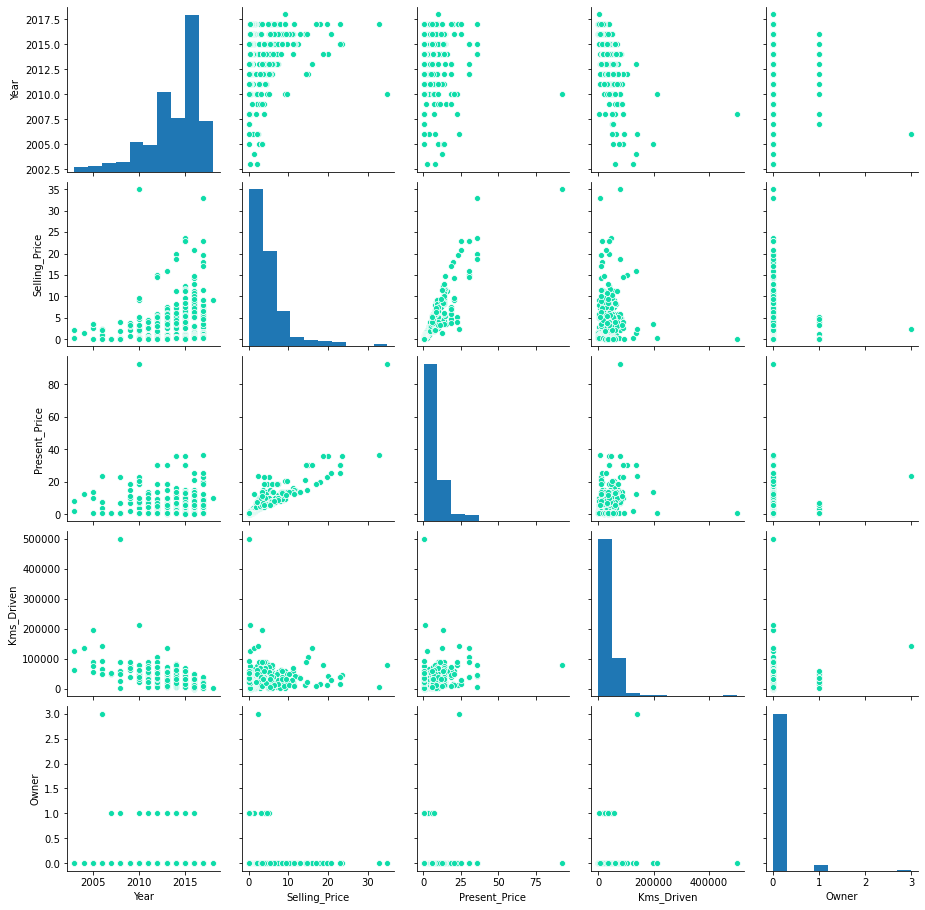

In [22]:
# Let see the relationship between each  left over feature in dataset
sns.pairplot(data = data, plot_kws={'color':'#0EDCA9'})

#### Handling categorical / nominal data

In [24]:
# Let see how many different values are in nominal feature Car_name
print(f" Unique values for sex: {len(data['Car_Name'].unique())} \n")

 Unique values for sex: 98 



In [28]:
# Let use OneHotEncoder for nominal features Car_Name and Fuel_Type
from sklearn.preprocessing import OneHotEncoder
data_2 = data.copy()
ohe = OneHotEncoder()
ohe.fit(data_2.loc[:, ['Car_Name', 'Fuel_Type']])
df_enc = pd.DataFrame(ohe.transform(data_2.loc[:, ['Car_Name', 'Fuel_Type']]).toarray(), columns=ohe.get_feature_names())
df_enc.head(5)

,x0_800,x0_Activa 3g,x0_Activa 4g,x0_Bajaj ct 100,x0_Bajaj Avenger 150,x0_Bajaj Avenger 150 street,x0_Bajaj Avenger 220,x0_Bajaj Avenger 220 dtsi,x0_Bajaj Avenger Street 220,x0_Bajaj Discover 100,...,x0_s cross,x0_swift,x0_sx4,x0_verna,x0_vitara brezza,x0_wagon r,x0_xcent,x1_CNG,x1_Diesel,x1_Petrol
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [29]:
# Now we will merge this two dataframes data_2 and df_enc by index
data_merge = pd.concat([data_2,df_enc], axis=1)

In [30]:
# Merged dataframe
data_merge.head(5)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,x0_800,...,x0_s cross,x0_swift,x0_sx4,x0_verna,x0_vitara brezza,x0_wagon r,x0_xcent,x1_CNG,x1_Diesel,x1_Petrol
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [31]:
# Transform Seller_Type and Transmission using LabelEncoder because this two features have just 2 different values
from sklearn.preprocessing import LabelEncoder
class_le = LabelEncoder()
data_merge['Seller_Type'] = class_le.fit_transform(data_merge.loc[: , 'Seller_Type'])
data_merge['Transmission'] = class_le.fit_transform(data_merge.loc[: , 'Transmission'])
display(data_merge.head(4))

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,x0_800,...,x0_s cross,x0_swift,x0_sx4,x0_verna,x0_vitara brezza,x0_wagon r,x0_xcent,x1_CNG,x1_Diesel,x1_Petrol
0,ritz,2014,3.35,5.59,27000,Petrol,0,1,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,sx4,2013,4.75,9.54,43000,Diesel,0,1,0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,ciaz,2017,7.25,9.85,6900,Petrol,0,1,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,wagon r,2011,2.85,4.15,5200,Petrol,0,1,0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


#### Dealing with missing data

In [32]:
# Missing values in whole dataset
data_merge.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
                ..
x0_wagon r       0
x0_xcent         0
x1_CNG           0
x1_Diesel        0
x1_Petrol        0
Length: 110, dtype: int64

#### Split dataset on train and test

In [36]:
print(data_merge.columns)

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner', 'x0_800',
       ...
       'x0_s cross', 'x0_swift', 'x0_sx4', 'x0_verna', 'x0_vitara brezza',
       'x0_wagon r', 'x0_xcent', 'x1_CNG', 'x1_Diesel', 'x1_Petrol'],
      dtype='object', length=110)


In [38]:
X = data_merge.drop(['Selling_Price', 'Car_Name', 'Fuel_Type'], axis = 1)
y = data_merge.Selling_Price
display(X.head(2))
display(y)

,Year,Present_Price,Kms_Driven,Seller_Type,Transmission,Owner,x0_800,x0_Activa 3g,x0_Activa 4g,x0_Bajaj ct 100,...,x0_s cross,x0_swift,x0_sx4,x0_verna,x0_vitara brezza,x0_wagon r,x0_xcent,x1_CNG,x1_Diesel,x1_Petrol
0,2014,5.59,27000,0,1,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2013,9.54,43000,0,1,0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

In [39]:
# Split independent and target variable on train and test dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.3, random_state=0)

In [40]:
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (210, 107)
y_train shape: (210,)
X_test shape: (91, 107)
y_test shape: (91,)


#### Bringing features onto the same scale¶

In [41]:
# First we will try to normalize data and than we will observe the distribution of data
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler()

# transform training data
X_train_norm = norm.fit_transform(X_train)

# transform testing dataabs
X_test_norm = norm.transform(X_test)

In [42]:
# Second we will try to standardize data and than we will observe the distribution of data
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

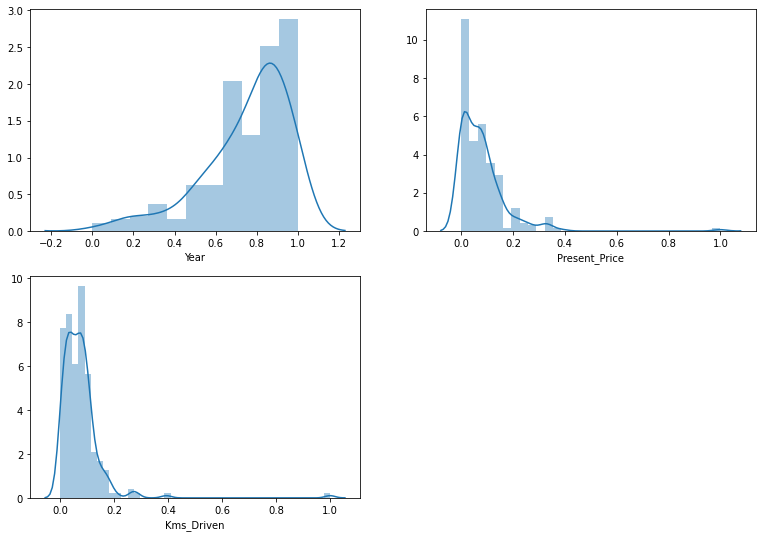

In [45]:
# Distribution of normalized train data
col_names = list(X_train.columns)
df_norm = pd.DataFrame(data = X_train_norm, columns = col_names)
sub_hist(data = df_norm.loc[:, ['Year', 'Present_Price', 'Kms_Driven']],m=13,n=9, num_col = 2)

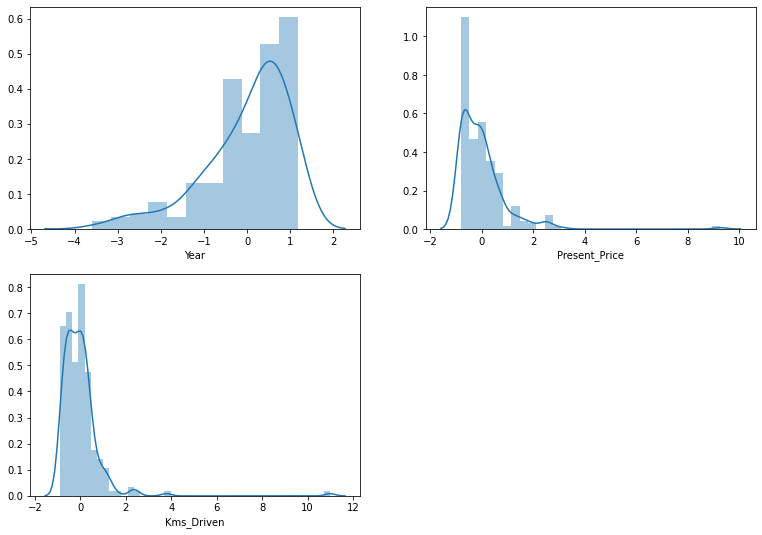

In [47]:
# Dist of standardized data
df_std = pd.DataFrame(data = X_train_std, columns = col_names)
sub_hist(df_std.loc[:, ['Year', 'Present_Price', 'Kms_Driven']],m=13,n=9, num_col = 2)

#### Data modeling

Let put 10 or more different models on standardized and balanced train dataset and than compare which one is modelling the best.

In [48]:
# Import cross_val_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

# Create dict acc_scores to see which model is the best
mean_sq_err_std = {}
mean_abs_err_std = {}

In [49]:
# Define function for train,fit and predict new outcomes 
def train_model(model, X_train, y_train, X_test, y_test, model_name, acc_scores = mean_sq_err_std):
    clf = model
    scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='r2')
    print(f"Cross_val_scores: {scores} \n ")
    print(f"Cross_val_scores_mean: {scores.mean()} \n ")
    print(f"Cross_val_scores_std: {scores.std()} \n")
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc_scores[model_name] = mean_squared_error(y_test, y_pred)
    print(f"Mean error of {model_name}: {acc_scores[model_name]}")
    return model, acc_scores, y_pred

In [50]:
# First model SVC kernel linear
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR, LinearSVR
svr_linear = SVR(kernel='linear', C=1)
model_1 = train_model(svr_linear, X_train_std, y_train, X_test_std, y_test, 'svr_linear')

Cross_val_scores: [0.84645664 0.90983757 0.79549362 0.74354167 0.3172305 ] 
 
Cross_val_scores_mean: 0.72251199959028 
 
Cross_val_scores_std: 0.20998799832783016 

Mean error of svr_linear: 4.46436938256606


In [51]:
mean_abs_err_std['svr_linear'] = mean_absolute_error(np.array(y_test), model_1[2])
mean_abs_err_std['svr_linear']

1.1410466188975241

In [52]:
# Second model SVR_rbf
SVR_rbf = SVR()
model_2 = train_model(SVR_rbf, X_train_std, y_train, X_test_std, y_test, 'SVR_rbf')

Cross_val_scores: [0.54535658 0.1266755  0.56482054 0.47805939 0.75595468] 
 
Cross_val_scores_mean: 0.4941733388823108 
 
Cross_val_scores_std: 0.2056475367280838 

Mean error of SVR_rbf: 17.59551646219372


In [53]:
mean_abs_err_std['SVR_rbf'] = mean_absolute_error(np.array(y_test), model_2[2])
mean_abs_err_std['SVR_rbf']

2.166130751278597

In [54]:
# Third model RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
ran_for_reg = RandomForestRegressor()
model_3 = train_model(ran_for_reg, X_train_std, y_train, X_test_std, y_test, 'ran_for_reg')

Cross_val_scores: [0.96355977 0.80560031 0.70726448 0.93793162 0.96475986] 
 
Cross_val_scores_mean: 0.8758232083418175 
 
Cross_val_scores_std: 0.10276982721178202 

Mean error of ran_for_reg: 2.782396292527471


In [55]:
mean_abs_err_std['ran_for_reg'] = mean_absolute_error(np.array(y_test), model_3[2])
mean_abs_err_std['ran_for_reg']

0.7648439560439559

In [56]:
# Fourth model LinearRegression
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
model_4 = train_model(lin_reg, X_train_std, y_train, X_test_std, y_test, 'lin_reg')

Cross_val_scores: [-2.08994694e+28 -1.54026807e+28 -2.42822872e+28 -5.96719604e+28
 -2.29946099e+28] 
 
Cross_val_scores_mean: -2.8650201527495072e+28 
 
Cross_val_scores_std: 1.5804964859288343e+28 

Mean error of lin_reg: 1.487494933156812e+25


In [57]:
# Mean absolute error for LinearRegression
mean_abs_err_std['lin_reg'] = mean_absolute_error(np.array(y_test), model_4[2])
mean_abs_err_std['lin_reg']

1541580056335.0437

Text(0, 0.5, 'Testing Accuracy')

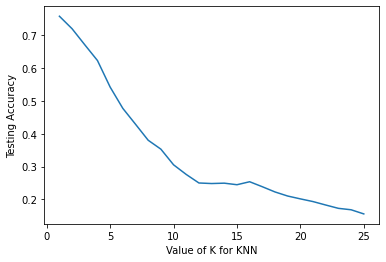

In [58]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
%matplotlib inline
import matplotlib.pyplot as plt

#import metrics model to check the accuracy 
from sklearn import metrics
#Try running from k=1 through 25 and record testing accuracy
k_range = range(1,26)
scores = {}
scores_list = []
for k in k_range:
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(X_train_std,y_train)
        y_pred=knn.predict(X_test_std)
        scores[k] = metrics.mean_squared_error(y_test,y_pred)
        scores_list.append(metrics.r2_score(y_test,y_pred))


#plot the relationship between K and the testing accuracy
plt.plot(k_range,scores_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [60]:
# Let see scores
for k in range(1,20):
    print(f"{k}: {scores_list[k]}")

1: 0.7200030222563596
2: 0.671220229157311
3: 0.6232064845013143
4: 0.542308082501537
5: 0.47741424232027796
6: 0.42908824612120167
7: 0.38026000860600173
8: 0.35315039482183985
9: 0.30546047730847115
10: 0.2760499808063832
11: 0.2500442414278736
12: 0.24836897186961704
13: 0.2494811008286718
14: 0.24475080530147897
15: 0.25383251025111564
16: 0.23863197652652623
17: 0.2227179418066072
18: 0.21027363796982557
19: 0.20161453985120892


In [61]:
models_KNN = {}
for k in [2,3,4]:
    KNN = KNeighborsRegressor(n_neighbors=k)
    print(f"Results of KNN with {k} neighbors: \n ")
    
    models_KNN['KNN_' + str(k)+'_neigh'] = train_model(KNN, X_train_std, y_train, X_test_std, y_test, model_name ='KNN_'+str(k))

Results of KNN with 2 neighbors: 
 
Cross_val_scores: [ 0.28686372  0.56517806  0.44871295  0.60471147 -0.2921856 ] 
 
Cross_val_scores_mean: 0.3226561180258331 
 
Cross_val_scores_std: 0.32667227523575965 

Mean error of KNN_2: 8.373605494505494
Results of KNN with 3 neighbors: 
 
Cross_val_scores: [ 0.00360252  0.5690537   0.35685865  0.39088203 -0.54873691] 
 
Cross_val_scores_mean: 0.15433199587763857 
 
Cross_val_scores_std: 0.3964826148718022 

Mean error of KNN_3: 9.832506471306472
Results of KNN with 4 neighbors: 
 
Cross_val_scores: [-0.09155392  0.53730529  0.26544071  0.32919176 -0.75530278] 
 
Cross_val_scores_mean: 0.05701621011085014 
 
Cross_val_scores_std: 0.4539015609861696 

Mean error of KNN_4: 11.26840824175824


In [63]:
# Mean absolute error for KNN Regressor
mean_abs_err_std['KNN_2'] = mean_absolute_error(np.array(y_test), models_KNN['KNN_2_neigh'][2])
mean_abs_err_std['KNN_3'] = mean_absolute_error(np.array(y_test), models_KNN['KNN_3_neigh'][2])
mean_abs_err_std['KNN_4'] = mean_absolute_error(np.array(y_test), models_KNN['KNN_4_neigh'][2])
print(f"MAE for KNN_2: {mean_abs_err_std['KNN_2']} \n")
print(f"MAE for KNN_3: {mean_abs_err_std['KNN_3']} \n")
print(f"MAE for KNN_4: {mean_abs_err_std['KNN_4']} \n")

MAE for KNN_2: 1.8568131868131867 

MAE for KNN_3: 2.142930402930403 

MAE for KNN_4: 2.317252747252747 



In [64]:
# 8th XGBoostRegressor
import xgboost as xgb
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)
# Fit the model
xg_reg.fit(X_train_std,y_train)
# Test model
y_pred = xg_reg.predict(X_test_std)
mean_sq_err_std['xgb_reg_squarederror'] = mean_squared_error(y_test, y_pred)
mean_abs_err_std['xgb_reg_squarederror'] = mean_absolute_error(y_test, y_pred)
print(f"MSE for XGBoost Regressor: {mean_sq_err_std['xgb_reg_squarederror']} \n")
print(f"MSA for XGBoost Regressor: {mean_abs_err_std['xgb_reg_squarederror']} \n")

MSE for XGBoost Regressor: 18.97195151985474 

MSA for XGBoost Regressor: 2.3592522035588277 



In [65]:
# 9th model DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
dec_tree_reg = DecisionTreeRegressor()
model_9 = train_model(dec_tree_reg, X_train_std, y_train, X_test_std, y_test, model_name = 'dec_tree_reg')

Cross_val_scores: [ 0.95098625  0.85132508 -0.25549674  0.94623471  0.94456991] 
 
Cross_val_scores_mean: 0.6875238436799741 
 
Cross_val_scores_std: 0.47297676505188874 

Mean error of dec_tree_reg: 2.4897901098901096


In [66]:
# Mean absolute error for DecisionTreeRegressor
mean_abs_err_std['dec_tree_reg'] = mean_absolute_error(np.array(y_test), model_9[2])
mean_abs_err_std['dec_tree_reg']

0.8504395604395603

In [67]:
# 10th model ExtraTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import ExtraTreeRegressor
extra_tree = ExtraTreeRegressor(random_state=0)
bag_reg_extra_tree = BaggingRegressor(extra_tree, random_state=0)
model_10 = train_model(bag_reg_extra_tree, X_train_std, y_train, X_test_std, y_test, model_name = 'bag_reg_extra_tree')

Cross_val_scores: [0.94845132 0.70267529 0.91716802 0.82782902 0.93070779] 
 
Cross_val_scores_mean: 0.8653662877584386 
 
Cross_val_scores_std: 0.09136023130303465 

Mean error of bag_reg_extra_tree: 2.3931190769230777


In [68]:
# Mean absolute error for DecisionTreeRegressor
mean_abs_err_std['bag_reg_extra_tree'] = mean_absolute_error(np.array(y_test), model_10[2])
mean_abs_err_std['bag_reg_extra_tree']

0.6985494505494507

In [69]:
# Lets plot the results of models
df_MSE = pd.DataFrame({'models': list(mean_sq_err_std.keys()),
                          'models_err': list(mean_sq_err_std.values())})
df_MSE

,models,models_err
0,svr_linear,4.464369e+00
1,SVR_rbf,1.759552e+01
2,ran_for_reg,2.782396e+00
3,lin_reg,1.487495e+25
4,KNN_2,8.373605e+00
5,KNN_3,9.832506e+00
6,KNN_4,1.126841e+01
7,xgb_reg_squarederror,1.897195e+01
8,dec_tree_reg,2.489790e+00
9,bag_reg_extra_tree,2.393119e+00


In [70]:
# Lets plot the results of models MAE
df_MAE = pd.DataFrame({'models': list(mean_abs_err_std.keys()),
                          'models_err': list(mean_abs_err_std.values())})
df_MAE

,models,models_err
0,svr_linear,1.141047e+00
1,SVR_rbf,2.166131e+00
2,ran_for_reg,7.648440e-01
3,lin_reg,1.541580e+12
4,KNN_2,1.856813e+00
5,KNN_3,2.142930e+00
6,KNN_4,2.317253e+00
7,xgb_reg_squarederror,2.359252e+00
8,dec_tree_reg,8.504396e-01
9,bag_reg_extra_tree,6.985495e-01


[Text(0, 0.5, 'models_err')]

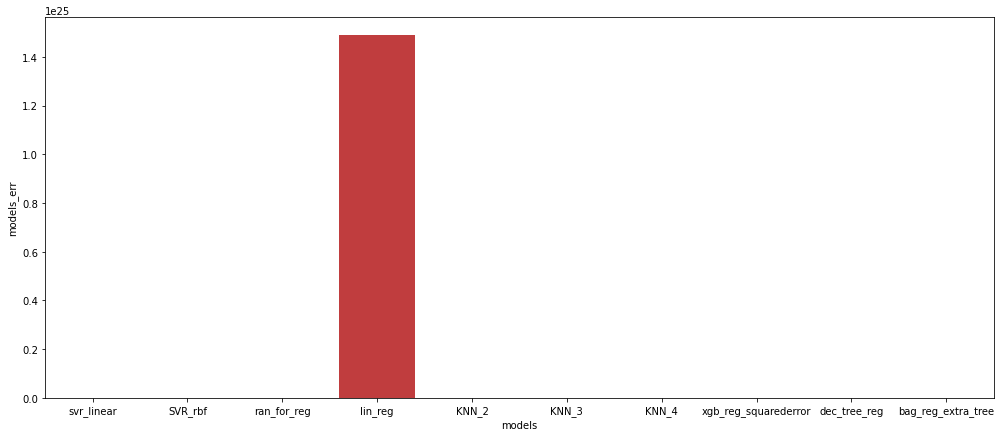

In [71]:
plt.figure(figsize=(17,7))
ax = sns.barplot(x = "models", y = "models_err", data = df_MSE)
ax.set(ylabel = "models_err")

In [72]:
# Let see which model gives the best result
print(f"The model with the smallest error is {min(mean_sq_err_std, key=mean_sq_err_std.get)} and it's error is {mean_sq_err_std[min(mean_sq_err_std, key=mean_sq_err_std.get)]:.3f}.")

The model with the smallest error is bag_reg_extra_tree and it's error is 2.393.


[Text(0, 0.5, 'models_err')]

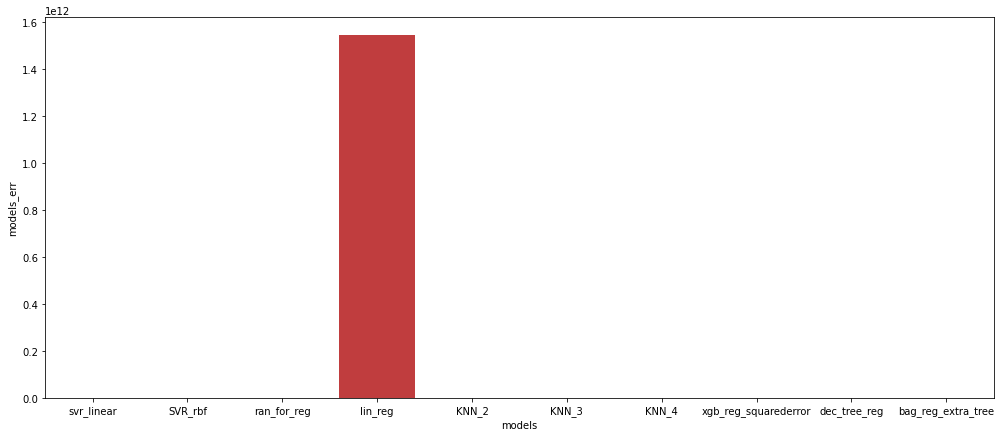

In [73]:
# Let see the results with MAE
plt.figure(figsize=(17,7))
ax = sns.barplot(x = "models", y = "models_err", data = df_MAE)
ax.set(ylabel = "models_err")

In [76]:
# Let see which model gives the best result
print(f"The model with the smallest mean abs error is {min(mean_abs_err_std, key=mean_abs_err_std.get)} and it's error is {mean_abs_err_std[min(mean_abs_err_std, key=mean_abs_err_std.get)]:.3f}.")

The model with the smallest mean abs error is bag_reg_extra_tree and it's error is 0.699.
